#### **Importing Libraries**

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set(style='whitegrid', font_scale=1.2)

#### **Loading Data**

In [14]:
# Loading the data
df = pd.read_csv('anova_test_csv.csv')
df.head()

,participant_code,condition,start_cvs_score,end_cvs_score,difference_cvs_score,backspace_count,ratio_backspace_word_count,word_count,percent_change_word_count
0,P0,No Change,2,4,2,177,0.274845,644,0.0
1,P0,Font Size,4,7,3,209,0.305556,684,6.2
2,P0,Brightness,1,1,0,196,0.230860,849,24.1
3,P1,No Change,1,2,1,150,0.153374,978,0.0
4,P1,Brightness,0,1,1,173,0.158280,1093,11.8


In [15]:
# drop unnecessary columns
df.drop(columns=['start_cvs_score', 'end_cvs_score', 'backspace_count', 'word_count'], inplace=True)
df.head(24)

,participant_code,condition,difference_cvs_score,ratio_backspace_word_count,percent_change_word_count
0,P0,No Change,2,0.274845,0.00
1,P0,Font Size,3,0.305556,6.20
2,P0,Brightness,0,0.230860,24.10
3,P1,No Change,1,0.153374,0.00
4,P1,Brightness,1,0.158280,11.80
5,P1,Font Size,0,0.156313,2.04
6,P2,Font Size,0,0.158358,-9.18
7,P2,Brightness,8,0.164773,-6.30
8,P2,No Change,-1,0.131824,0.00
9,P3,Font Size,4,0.197031,-18.20


#### **Visualizing Data**

C:\Users\elzha\AppData\Local\Temp\ipykernel_18460\50641239.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\elzha\AppData\Local\Temp\ipykernel_18460\50641239.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\elzha\AppData\Local\Temp\ipykernel_18460\50641239.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


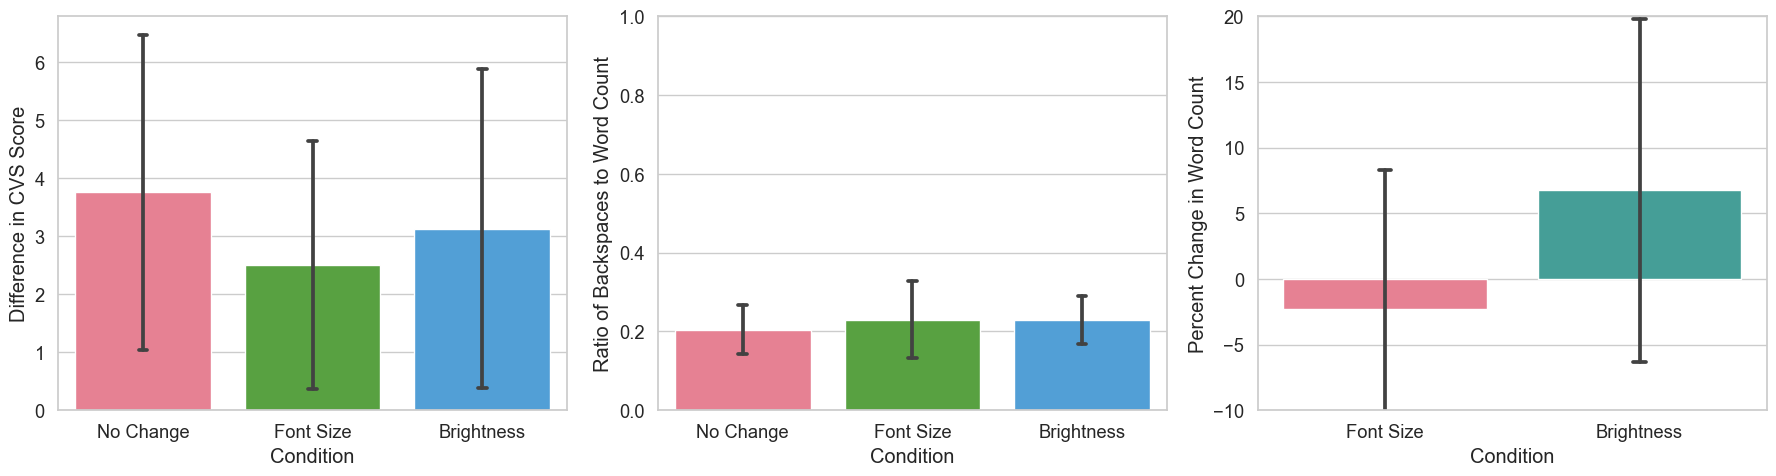

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating three subfigures
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Mean completion time by input type
sns.barplot(
    ax=axes[0],
    data=df, 
    x='condition', 
    y='difference_cvs_score', 
    ci='sd', 
    capsize=.05, 
    palette='husl'
)
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Difference in CVS Score')

# 2. Ratio of Backspaces to Word Count
sns.barplot(
    ax=axes[1],
    data=df, 
    x='condition', 
    y='ratio_backspace_word_count', 
    ci='sd', 
    capsize=.05, 
    palette='husl'
)
axes[1].set_ylim(0, 1)  # Set y-axis limits for subplot 2
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Ratio of Backspaces to Word Count')

# 3. Percent Change in Word Count
filtered_df = df.loc[df['condition'] != 'No Change']
sns.barplot(
    ax=axes[2],
    data=filtered_df, 
    x='condition', 
    y='percent_change_word_count', 
    ci='sd', 
    capsize=.05, 
    palette='husl'
)
axes[2].set_ylim(-10, 20)
axes[2].set_xlabel('Condition')
axes[2].set_ylabel('Percent Change in Word Count')

# Display the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


C:\Users\elzha\AppData\Local\Temp\ipykernel_5936\704857539.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\elzha\AppData\Local\Temp\ipykernel_5936\704857539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\elzha\AppData\Local\Temp\ipykernel_5936\704857539.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\elzha\AppData\Local\Temp\ipykernel_5936\704857539.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


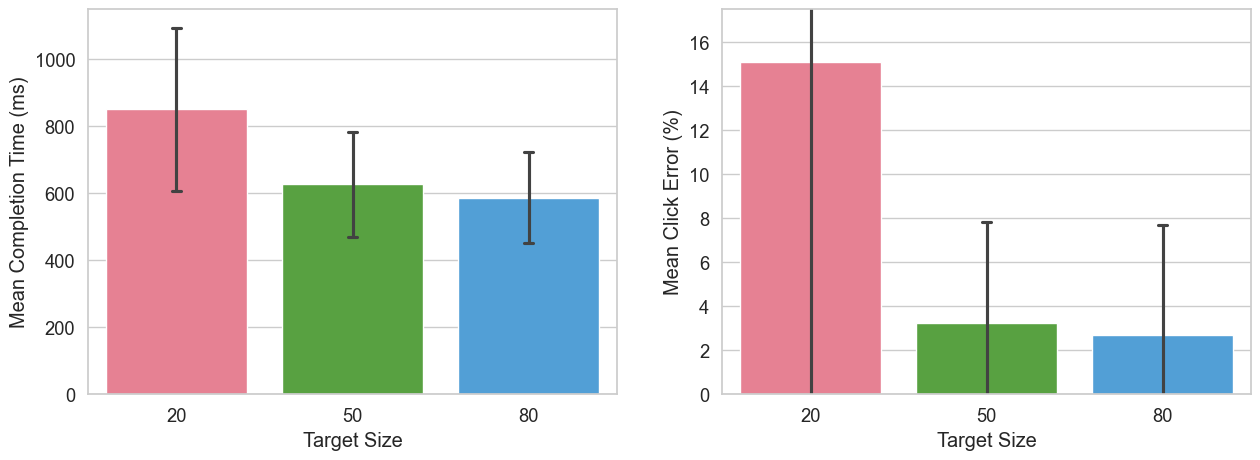

In [14]:
# Visualizing the effect of target size on mean completion time and mean click error

# Creating two subfigures
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Mean completion time by input type
sns.barplot(
    ax=axes[0],
    data=df, 
    x='target_size', 
    y='mean_completion_time', 
    ci='sd', 
    capsize=.05, 
    palette='husl'
)
axes[0].set_xlabel('Target Size')
axes[0].set_ylabel('Mean Completion Time (ms)')

# Mean error rate by input type
plt.gca().set_ylim(bottom=0, top=17.5) # Hiding negative StD values
sns.barplot(
    ax=axes[1],
    data=df, 
    x='target_size', 
    y='mean_click_error', 
    ci='sd', 
    capsize=.05, 
    palette='husl'
)
axes[1].set_xlabel('Target Size')
axes[1].set_ylabel('Mean Click Error (%)')

plt.show()

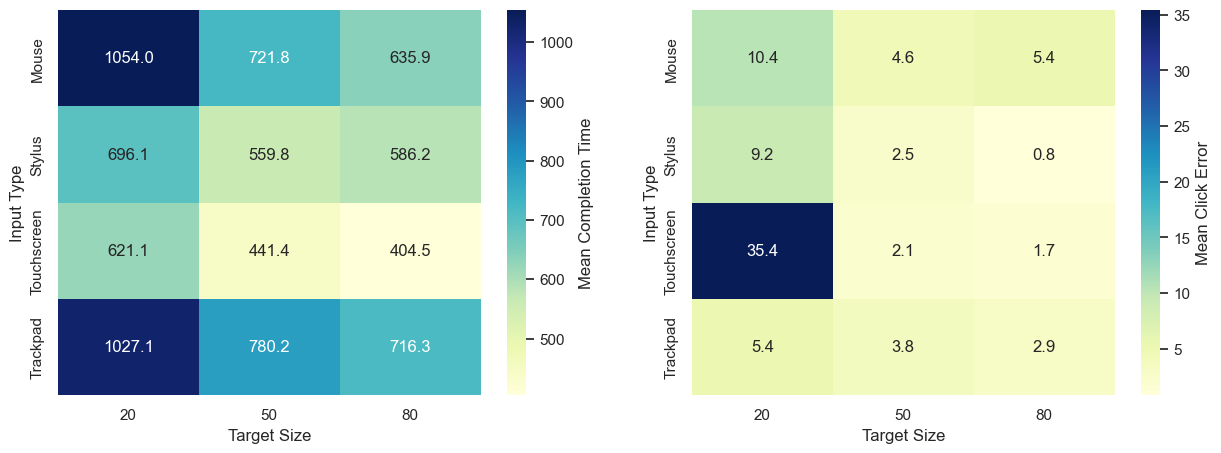

<Figure size 800x800 with 0 Axes>

In [32]:
# Visualization of Input Type and Target Size by the Average Mean Completion Time and the Average Mean Click Error Across all Participants
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

mean_data = df.groupby(['input', 'target_size']).mean_completion_time.mean().unstack()

plt.figure(figsize=(8, 8))
sns.heatmap(mean_data, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Mean Completion Time'}, ax=axes[0])
axes[0].set_xlabel('Target Size')
axes[0].set_ylabel('Input Type')

mean_data = df.groupby(['input', 'target_size']).mean_click_error.mean().unstack()
sns.heatmap(mean_data, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Mean Click Error'}, ax=axes[1])
axes[1].set_xlabel('Target Size')
axes[1].set_ylabel('Input Type')

plt.show()

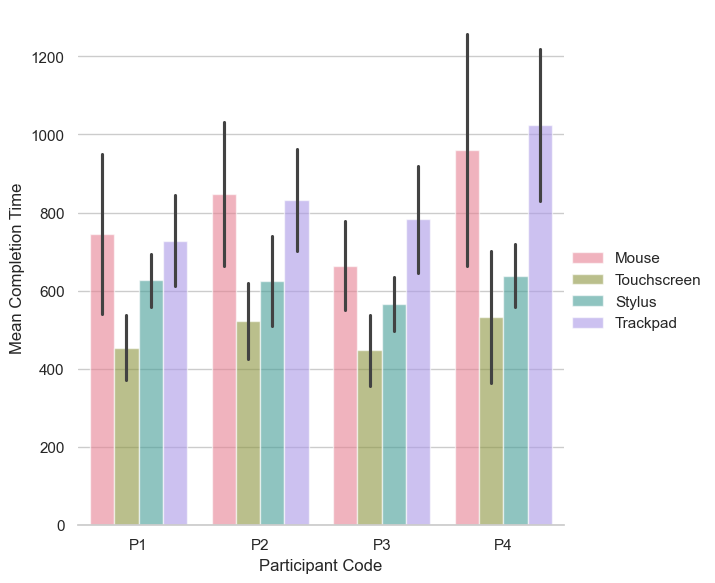

In [ ]:
# Visualization of mean completion time by participant and input type
g = sns.catplot(
    data=df, kind="bar",
    x="participant_code", y="mean_completion_time", hue="input",
    errorbar="sd", palette="husl", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Participant Code", "Mean Completion Time")
g.legend.set_title("")

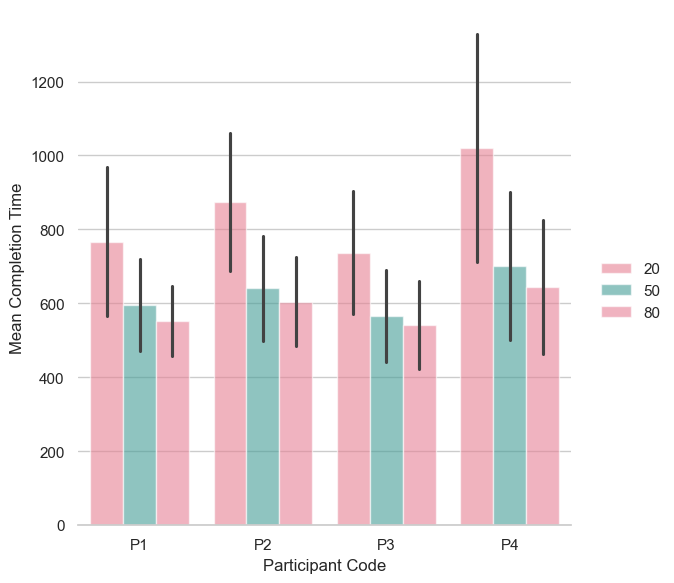

In [ ]:
# Visualization of mean completion time by participant and target_size
g = sns.catplot(
    data=df, kind="bar",
    x="participant_code", y="mean_completion_time", hue="target_size",
    errorbar="sd", palette="husl", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Participant Code", "Mean Completion Time")
g.legend.set_title("")

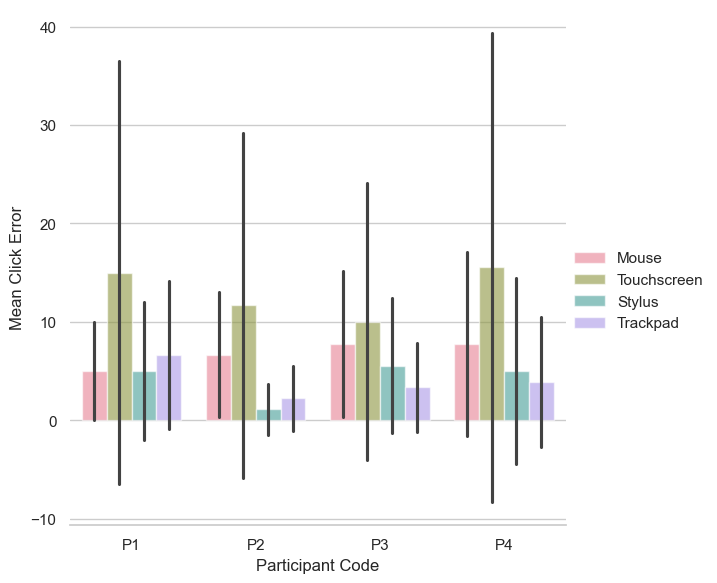

In [33]:
g = sns.catplot(
    data=df, kind="bar",
    x="participant_code", y="mean_click_error", hue="input",
    errorbar="sd", palette="husl", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Participant Code", "Mean Click Error")
g.legend.set_title("")

#### **Two-Way ANOVA/TukeyHSD on difference between baseline CVS score and post CVS score**

In [11]:
# Two-way ANOVA
time_model = ols('difference_cvs_score ~ C(condition)', data=df).fit()
display(sm.stats.anova_lm(time_model, typ=2))


,sum_sq,df,F,PR(>F)
C(condition),62500.0,2.0,0.48121,0.624684
Residual,1363750.0,21.0,NaN,NaN


#### **Two-Way ANOVA/TukeyHSD on Ratio Backspace to Word Count**

In [16]:
# Two-way ANOVA
error_model = ols('ratio_backspace_word_count ~ C(condition)', data=df).fit()
display(sm.stats.anova_lm(error_model, typ=2))

,sum_sq,df,F,PR(>F)
C(condition),0.003321,2.0,0.289811,0.75135
Residual,0.120309,21.0,NaN,NaN


#### **Two-Way ANOVA/TukeyHSD on Percent Change Word Count**

In [17]:
# Two-way ANOVA
error_model = ols('percent_change_word_count ~ C(condition)', data=df).fit()
display(sm.stats.anova_lm(error_model, typ=2))

,sum_sq,df,F,PR(>F)
C(condition),350.595925,2.0,1.856294,0.180993
Residual,1983.121337,21.0,NaN,NaN
